In [1]:
!pip install python-Levenshtein

/bin/bash: switchml: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `switchml'
/bin/bash: _moduleraw: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `_moduleraw'


In [2]:
!pip install -U gensim

/bin/bash: switchml: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `switchml'
/bin/bash: _moduleraw: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `_moduleraw'


In [ ]:
!pip install hvplot

In [ ]:
!pip install holoviews

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px
import holoviews as hv
import seaborn as sns
import hvplot as hv
import hvplot.pandas
import holoviews as hv
from hvplot import hvPlot

hv.extension('bokeh')

In [ ]:
df = pd.read_csv('okcupid_profiles.csv')

In [ ]:
df.info()

In [ ]:
df.head(3)

In [ ]:
#  10 essay columns in this dataset and they relate to open text fields 

#         About Me / Self summary
#         Current Goals / Aspirations
#         My Golden Rule / My traits
#         I could probably beat you at / Talent
#         The last show I binged / Hobbies
#         A perfect day / Moments
#         I value / Needs
#         The most private thing I'm willing to admit / Secrets
#         What I'm actually looking for / Dating



In [97]:
# !pip install vega_datasets

In [98]:
df.isna().sum()

age                0
status             0
sex                0
orientation        0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
pets           19921
religion       20226
sign           11056
smokes          5512
speaks            50
essay0          5488
essay1          7572
essay2          9638
essay3         11476
essay4         10537
essay5         10850
essay6         13771
essay7         12451
essay8         19225
essay9         12603
dtype: int64

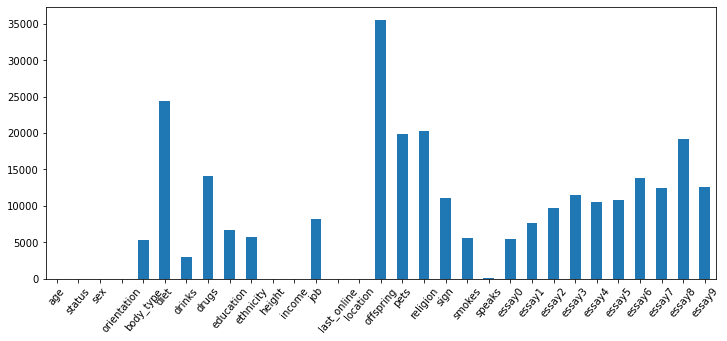

In [99]:
plt.figure(figsize=(12, 5))

df.isna().sum().plot(kind="bar")
plt.xticks(rotation=50);

In [100]:
columns=["body_type","diet", "education","drinks","drugs","ethnicity","job","offspring","pets","religion","sign","smokes","speaks"]
df[columns]=df[columns].fillna("No info")
df["height"]=df["height"].fillna(0)
df["income"]=df["income"].replace(-1, 0)

In [101]:
## Combining essays into 1 profile text
df["profile_text"] = (df["essay0"].str.cat(df.iloc[:,22:-1].astype(str), sep=" "))
df=df.drop(df.iloc[:,21:-1], axis=1)
df["profile_text"]=df["profile_text"].fillna("No info")
df["Total Words"]=df["profile_text"].str.split().str.len()
df.head(3)

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,last_online,location,offspring,pets,religion,sign,smokes,speaks,profile_text,Total Words
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,2012-06-28-20-30,"south san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism and very serious about it,gemini,sometimes,english,about me: i would love to think that i was so...,420
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,2012-06-29-21-41,"oakland, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism but not too serious about it,cancer,no,"english (fluently), spanish (poorly), french (...",i am a chef: this is what that means. 1. i am ...,271
2,38,available,m,straight,thin,anything,socially,No info,graduated from masters program,No info,...,2012-06-27-09-10,"san francisco, california",No info,has cats,No info,pisces but it doesn&rsquo;t matter,no,"english, french, c++","i'm not ashamed of much, but writing public te...",819


In [102]:
no_info=df[df["profile_text"].str.contains("No info")]
no_info.head(1)

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,last_online,location,offspring,pets,religion,sign,smokes,speaks,profile_text,Total Words
7,31,single,f,straight,average,mostly anything,socially,never,graduated from college/university,white,...,2012-06-29-12-30,"san francisco, california","doesn't have kids, but wants them",likes dogs and likes cats,christianity,sagittarius,no,"english, spanish (okay)",No info,2


In [103]:
df.isna().sum() 

age             0
status          0
sex             0
orientation     0
body_type       0
diet            0
drinks          0
drugs           0
education       0
ethnicity       0
height          0
income          0
job             0
last_online     0
location        0
offspring       0
pets            0
religion        0
sign            0
smokes          0
speaks          0
profile_text    0
Total Words     0
dtype: int64

In [104]:
df.describe()

,age,height,income,Total Words
count,59946.000000,59946.000000,59946.000000,59946.000000
mean,32.340290,68.291863,20034.030628,323.728706
std,9.452779,4.023813,97346.025793,275.302965
min,18.000000,0.000000,0.000000,2.000000
25%,26.000000,66.000000,0.000000,138.000000
50%,30.000000,68.000000,0.000000,274.000000
75%,37.000000,71.000000,0.000000,445.000000
max,110.000000,95.000000,1000000.000000,9511.000000


In [105]:
df.dtypes

age               int64
status           object
sex              object
orientation      object
body_type        object
diet             object
drinks           object
drugs            object
education        object
ethnicity        object
height          float64
income            int64
job              object
last_online      object
location         object
offspring        object
pets             object
religion         object
sign             object
smokes           object
speaks           object
profile_text     object
Total Words       int64
dtype: object

In [106]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import paired_distances
from sklearn.metrics import jaccard_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from item_recommender import ItemRecommender

import re

In [107]:
df.head(1)

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,last_online,location,offspring,pets,religion,sign,smokes,speaks,profile_text,Total Words
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,2012-06-28-20-30,"south san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism and very serious about it,gemini,sometimes,english,about me: i would love to think that i was so...,420


In [108]:
content_df=df["profile_text"]
content_df = content_df.rename_axis('id_').reset_index()
content_df.head()
content_df.columns


Index(['id_', 'profile_text'], dtype='object')

In [120]:
content_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_           59946 non-null  int64 
 1   profile_text  59946 non-null  object
 2   cleaned       59946 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [121]:
content_df['id_'] = content_df['id_'].apply(str)

In [122]:
content_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_           59946 non-null  object
 1   profile_text  59946 non-null  object
 2   cleaned       59946 non-null  object
dtypes: object(3)
memory usage: 1.4+ MB


# Content-Based Recommendation System using Word Embeddings

In [69]:
# instantiating and generating the count matrix
count = CountVectorizer()
count_matrix = count.fit_transform(content_df["profile_text"])
count_matrix

<59946x144081 sparse matrix of type '<class 'numpy.int64'>'
	with 11319404 stored elements in Compressed Sparse Row format>

In [70]:
indices = pd.Series(content_df.index)
indices

0            0
1            1
2            2
3            3
4            4
         ...  
59941    59941
59942    59942
59943    59943
59944    59944
59945    59945
Length: 59946, dtype: int64

In [24]:
rec = ItemRecommender()
count_df = pd.DataFrame(count_matrix.todense(), index=indices.values)

MemoryError: Unable to allocate 64.4 GiB for an array with shape (59946, 144081) and data type int64

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')

matrix = tf.fit_transform(content_df['profile_text'])

In [ ]:
from sklearn.metrics.pairwise import linear_kernel

cosine_similarities = linear_kernel(matrix,matrix)

In [ ]:
indices = pd.Series(df.index, index=content_df['id_'])

def movie_recommend(original_title):
    
    idx = indices[original_title]

    sim_scores = list(enumerate(cosine_similarities[idx]))

  sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    sim_scores = sim_scores[1:31]

    movie_indices = [i[0] for i in sim_scores]

    return movie_title.iloc[movie_indices]

In [ ]:
content_df['cleaned'][0]

In [109]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
import re
import string
import random
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import Word2Vec
from gensim.models.phrases import Phrases, Phraser
from matplotlib import pyplot
from gensim.models import KeyedVectors

[nltk_data] Downloading package stopwords to /home/ubuntu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [110]:
#Utitlity functions for removing ASCII characters, converting lower case, removing stop words, html and punctuation from description

def _removeNonAscii(s):
    return "".join(i for i in s if  ord(i)<128)

def make_lower_case(text):
    return text.lower()

def remove_stop_words(text):
    text = text.split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text

def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    text = " ".join(text)
    return text


content_df['cleaned'] = content_df['profile_text'].apply(_removeNonAscii)
content_df['cleaned'] = content_df.cleaned.apply(func = make_lower_case)
content_df['cleaned'] = content_df.cleaned.apply(func = remove_stop_words)
content_df['cleaned'] = content_df.cleaned.apply(func=remove_punctuation)
content_df['cleaned'] = content_df.cleaned.apply(func=remove_html)

In [111]:
content_df.head(1)

,id_,profile_text,cleaned
0,0,about me: i would love to think that i was so...,me would love think kind intellectual either d...


Recommendation Engine 
Building two recommendation engine using Average Word2Vec and TF-IDF Word2Vec word embeddings.

Average Word2Vec 
Splitting the descriptions into words and storing in a list called ‘corpus’ for training our word2vec model:

In [112]:
corpus = []
for words in content_df['cleaned']:
    corpus.append(words.split())
len(corpus)

59946

In [113]:
# Downloading the Google pretrained Word2Vec Model

In [114]:
import gensim.downloader as api
path = api.load("word2vec-google-news-300", return_path=True)
print(path)

/home/ubuntu/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz


Training our corpus with Google pre-trained Word2Vec model:

In [125]:
# Training our corpus with Google Pretrained Model
google_model = Word2Vec(vector_size=300,window=5, min_count = 2, workers = -1)

In [126]:
google_model.build_vocab(corpus)

In [127]:
# #model.intersect_word2vec_format('./word2vec/GoogleNews-vectors-negative300.bin', lockf=1.0, binary=True)
# EMBEDDING_FILE= '/home/ubuntu/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz'
# google_model.intersect_word2vec_format(EMBEDDING_FILE, lockf=1.0, binary=True)

google_model.train(corpus, total_examples=google_model.corpus_count, epochs = 5)

(0, 0)

Creating a function called vectors for generating average Word2Vec embeddings and storing them as a list called ‘word_embeddings’. The code follows the steps which I have written in the above average word2vec explanation.

In [128]:
# Generate the average word2vec for the each profile_text description:

def vectors(x):    
    # Creating a list for storing the vectors (description into vectors)
    global word_embeddings
    word_embeddings = []

    # Reading the each book description 
    for line in content_df['cleaned']:
        avgword2vec = None
        count = 0
        for word in line.split():
            if word in google_model.wv.key_to_index:
                count += 1
                if avgword2vec is None:
                    avgword2vec = google_model[word]
                else:
                    avgword2vec = avgword2vec + google_model[word]
                
        if avgword2vec is not None:
            avgword2vec = avgword2vec / count
        
            word_embeddings.append(avgword2vec)


Top 5 Recommendation using Average Word2Vec

In [129]:
# Recommending the Top 5 similar id

def recommendations(id_):
    
    # Calling the function vectors

    vectors(content_df)
    
    # finding cosine similarity for the vectors

    cosine_similarities = cosine_similarity(array_embeddings, array_embeddings)

    # taking the title and book image link and store in new data frame called books
    jane = content_df[['id_', 'profile_text']]
    #Reverse mapping of the index
    indices = pd.Series(content_df.index, content_df = content_df['id_']).drop_duplicates()
         
    idx = indices[id_]
    sim_scores = list(enumerate(cosine_similarities[idx]))
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)
    sim_scores = sim_scores[1:6]
    jane_indices = [i[0] for i in sim_scores]
    recommend = jane.iloc[jane_indices]

Let’s get a recommendation based on id [#1]:

In [130]:
recommendations("0")

TypeError: 'Word2Vec' object is not subscriptable

In [131]:
#Building the TF-IDF model

In [132]:
#Building TFIDF model and calculate TFIDF score

tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df = 5, stop_words='english')
tfidf.fit(content_df['cleaned'])

# Getting the words from the TF-IDF model

tfidf_list = dict(zip(tfidf.get_feature_names(), list(tfidf.idf_)))
tfidf_feature = tfidf.get_feature_names() # tfidf words/col-names

In [ ]:
# Building TF-IDF Word2Vec 

# Storing the TFIDF Word2Vec embeddings
tfidf_vectors = []; 
line = 0;
# for each book description
for desc in corpus: 
  # Word vectors are of zero length (Used 300 dimensions)
    sent_vec = np.zeros(300) 
    # num of words with a valid vector in the book description
    weight_sum =0; 
    # for each word in the book description
    for word in desc: 
        if word in google_model.wv.key_to_index and word in tfidf_feature:
            vec = google_model.wv[word]
            tf_idf = tfidf_list[word] * (desc.count(word) / len(desc))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_vectors.append(sent_vec)
    line += 1

In [ ]:
#Recommending top 5 similar people

def recommendations(title):
    
    # finding cosine similarity for the vectors

    cosine_similarities = cosine_similarity(tfidf_vectors,  tfidf_vectors)
    
    # taking the title and book image link and store in new data frame called books
    jane = content_df[['id_', 'profile_text']]
    #Reverse mapping of the index
    indices = pd.Series(content_df.index, index = content_df['id_']).drop_duplicates()
         
    idx = indices[title]
    sim_scores = list(enumerate(cosine_similarities[idx]))
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)
    sim_scores = sim_scores[1:6]
    jane_indices = [i[0] for i in sim_scores]
    recommend = jane.iloc[jane_indices]


In [ ]:
recommendations("0")

In [18]:
data=(df.groupby("age")[["sex"]].count())
data["% of participants"]=(data["sex"]/data["sex"].sum())*100
data=data.rename(columns= {"sex":"number of participants"})
data.hvplot.bar(x='age', y='number of participants', rot=90)

:Bars   [age]   (number of participants)

In [19]:
df.columns

Index(['age', 'status', 'sex', 'orientation', 'body_type', 'diet', 'drinks',
       'drugs', 'education', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'pets', 'religion', 'sign',
       'smokes', 'speaks', 'profile text', 'Total Words'],
      dtype='object')

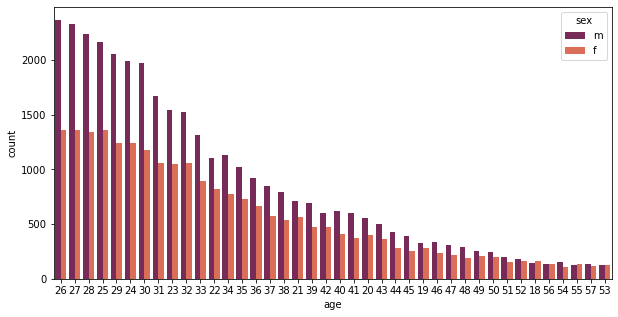

In [20]:
plt.figure(figsize=(10, 5))
sns.countplot(x='age', data=df,
hue='sex',palette="rocket",
order=df['age'].value_counts().iloc[:40].index);

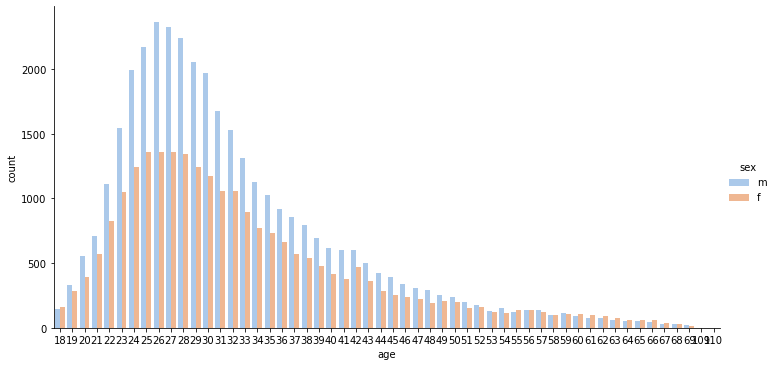

In [21]:
sns.catplot(x='age', data = df, kind='count', palette='pastel', hue='sex', 
            height=5, 
            aspect=2)

In [22]:
(df
 .groupby("age")
 [["Total Words"]]
 .mean()
 .sort_values(by="Total Words", ascending=False)
).hvplot.bar(x='age', y='Total Words', rot=90)


:Bars   [age]   (Total Words)

In [23]:
data=(df
 .groupby("status")
    [["sex"]]
 .count()
)
data["% of participants"]=(data["sex"]/data["sex"].sum())*100
data=data.rename(columns= {"sex":"number of participants"})
data

,number of participants,% of participants
status,,
available,1865,3.111133
married,310,0.517132
seeing someone,2064,3.443099
single,55697,92.911954
unknown,10,0.016682


In [24]:
data.hvplot.bar(x='status', y='number of participants', rot=90)


:Bars   [status]   (number of participants)

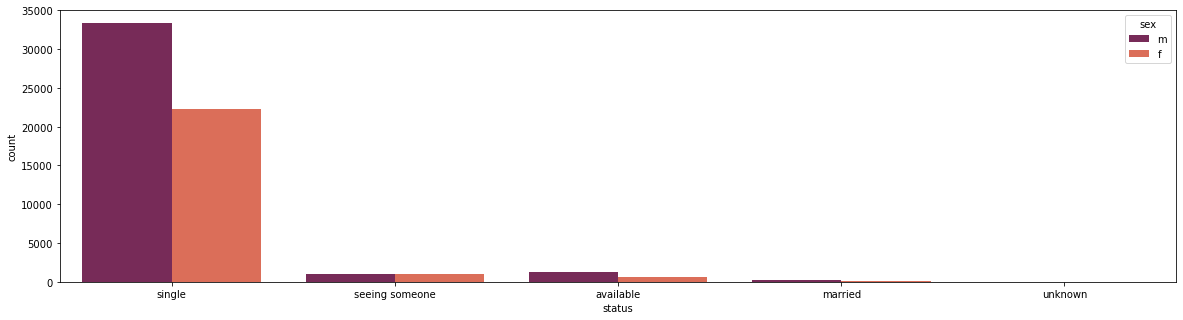

In [25]:
plt.figure(figsize=(20, 5))
sns.countplot(x='status', data=df,
hue='sex',palette="rocket",
order=df['status'].value_counts().iloc[:40].index);

In [26]:
(df
.groupby("status")
 [["Total Words"]]
 .mean()
).hvplot.bar(x="status", y="Total Words")

:Bars   [status]   (Total Words)

In [27]:
data=(df
 .groupby("orientation")
    [["sex"]]
 .count()
    .sort_values(by="sex", ascending=False)
)
data["% of participants"]=(data["sex"]/data["sex"].sum())*100
data=data.rename(columns= {"sex":"number of participants"})
data

,number of participants,% of participants
orientation,,
straight,51606,86.087479
gay,5573,9.296700
bisexual,2767,4.615821


In [28]:
data.hvplot.bar(x='orientation', y='number of participants', rot=90)


:Bars   [orientation]   (number of participants)

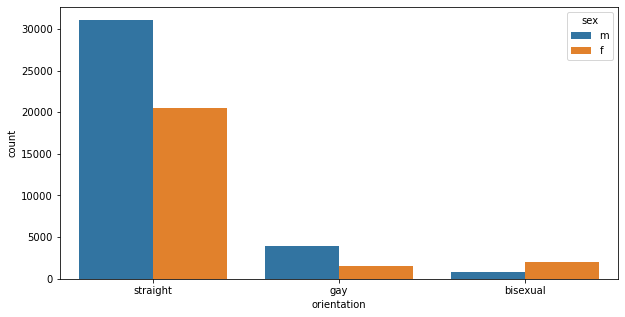

In [29]:
plt.figure(figsize=(10, 5))
sns.countplot(x='orientation', data=df,
hue='sex',
order=df['orientation'].value_counts().iloc[:10].index);

In [30]:
df['orientation'].value_counts()

straight    51606
gay          5573
bisexual     2767
Name: orientation, dtype: int64

In [31]:
(df
.groupby("orientation")
 [["Total Words"]]
 .median()
).hvplot.bar(x="orientation", y="Total Words")

:Bars   [orientation]   (Total Words)

In [32]:
data=(df
 .groupby("body_type")
    [["sex", "Total Words"]]
 .count()
 .sort_values(by="sex", ascending=False)
)
data["% of participants"]=(data["sex"]/data["sex"].sum())*100
data=data.rename(columns= {"sex":"number of participants"})
data

,number of participants,Total Words,% of participants
body_type,,,
average,14652,14652,24.441998
fit,12711,12711,21.204084
athletic,11819,11819,19.716078
No info,5296,5296,8.834618
thin,4711,4711,7.858740
curvy,3924,3924,6.545891
a little extra,2629,2629,4.385614
skinny,1777,1777,2.964335
full figured,1009,1009,1.683182


In [33]:
data.hvplot.bar(x='body_type', y='number of participants', rot=90)

:Bars   [body_type]   (number of participants)

In [34]:
data.hvplot.bar(x='body_type', y='Total Words', rot=90)

:Bars   [body_type]   (Total Words)

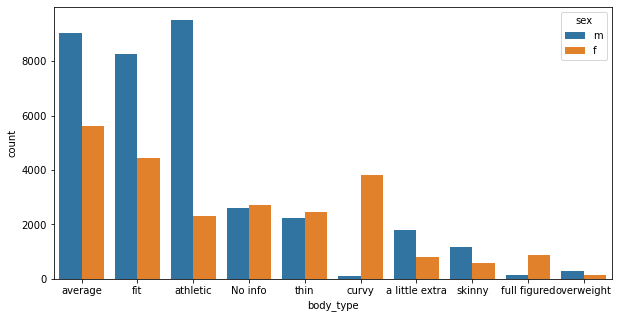

In [35]:
plt.figure(figsize=(10, 5))
sns.countplot(x='body_type', data=df,
hue='sex',
order=df['body_type'].value_counts().iloc[:10].index);

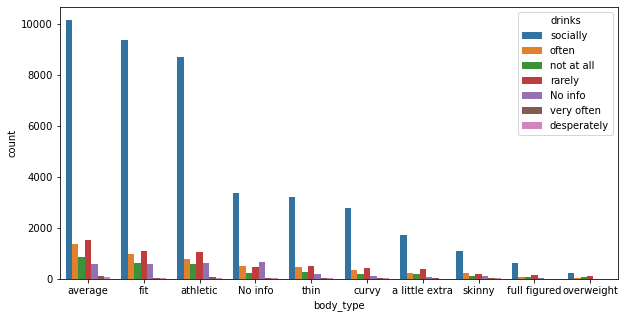

In [36]:
plt.figure(figsize=(10, 5))
sns.countplot(x='body_type', data=df,
hue='drinks',
order=df['body_type'].value_counts().iloc[:10].index);

In [37]:
data=(df
 .groupby("diet")
    [["sex", "Total Words"]]
 .count()
 .sort_values(by="sex", ascending=False)
)
data["% of participants"]=(data["sex"]/data["sex"].sum())*100
data=data.rename(columns= {"sex":"number of participants"})
data.hvplot.bar(x='diet', y='number of participants', rot=90)

:Bars   [diet]   (number of participants)

In [38]:
data

,number of participants,Total Words,% of participants
diet,,,
No info,24395,24395,40.694959
mostly anything,16585,16585,27.666567
anything,6183,6183,10.314283
strictly anything,5113,5113,8.529343
mostly vegetarian,3444,3444,5.745171
mostly other,1007,1007,1.679845
strictly vegetarian,875,875,1.459647
vegetarian,667,667,1.112668
strictly other,452,452,0.754012


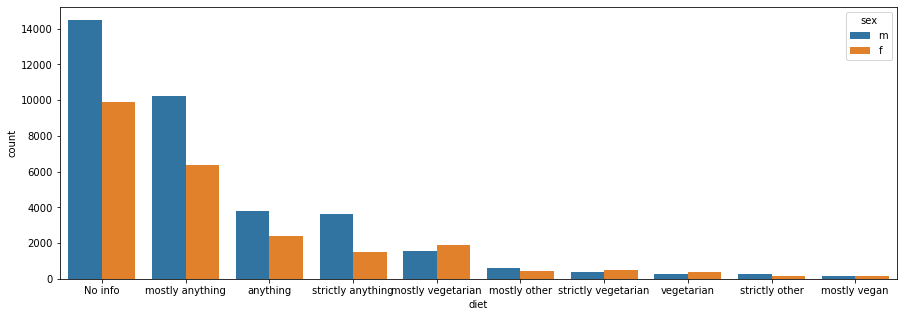

In [39]:
plt.figure(figsize=(15, 5))
sns.countplot(x='diet', data=df,
hue='sex',
order=df['diet'].value_counts().iloc[:10].index);

In [40]:
data=(df
 .groupby("drinks")
    [["sex", "Total Words"]]
 .count()
 .sort_values(by="sex", ascending=False)
)
data["% of participants"]=(data["sex"]/data["sex"].sum())*100
data=data.rename(columns= {"sex":"number of participants"})
data.hvplot.bar(x='drinks', y='number of participants', rot=90)

:Bars   [drinks]   (number of participants)

In [41]:
data

,number of participants,Total Words,% of participants
drinks,,,
socially,41780,41780,69.696060
rarely,5957,5957,9.937277
often,5164,5164,8.614420
not at all,3267,3267,5.449905
No info,2985,2985,4.979482
very often,471,471,0.785707
desperately,322,322,0.537150


In [42]:
data.hvplot.bar(x='drinks', y='Total Words', rot=90)

:Bars   [drinks]   (Total Words)

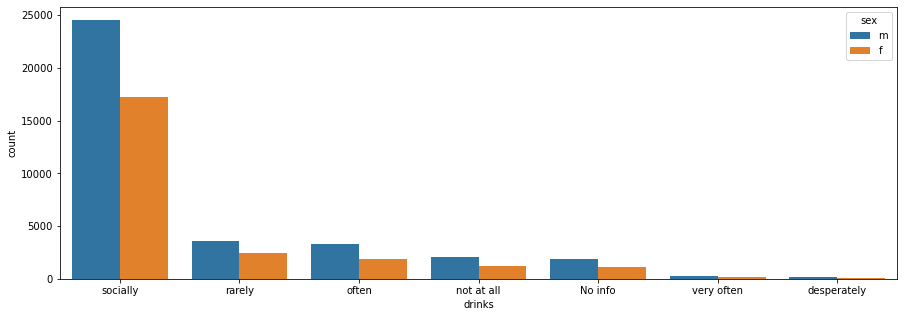

In [43]:
plt.figure(figsize=(15, 5))
sns.countplot(x='drinks', data=df,
hue='sex',
order=df['drinks'].value_counts().iloc[:10].index);

In [44]:
(df
.groupby("drinks")
 [["Total Words"]]
 .median()
 .sort_values(by="Total Words", ascending=False)
).hvplot.bar(x="drinks", y="Total Words")

:Bars   [drinks]   (Total Words)

In [45]:
data=(df
 .groupby("drugs")
    [["sex"]]
 .count()
 .sort_values(by="sex", ascending=False)
)
data["% of participants"]=(data["sex"]/data["sex"].sum())*100
data=data.rename(columns= {"sex":"number of participants"})
data.hvplot.bar(x='drugs', y='number of participants', rot=90)

:Bars   [drugs]   (number of participants)

In [46]:
(df
.groupby("drugs")
 [["Total Words"]]
 .median()
 .sort_values(by="Total Words", ascending=False)
).hvplot.bar(x="drugs", y="Total Words")

:Bars   [drugs]   (Total Words)

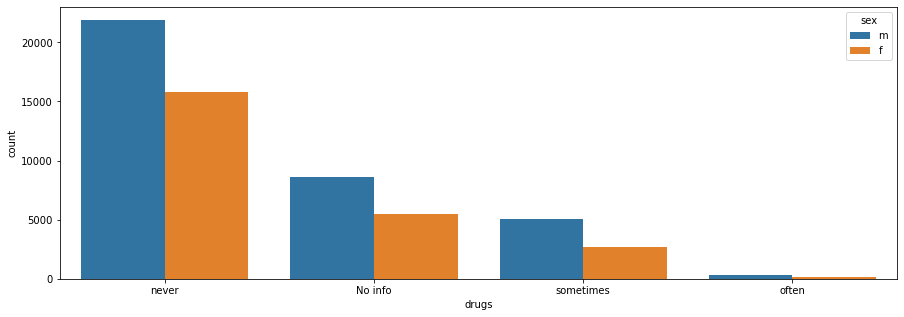

In [47]:
plt.figure(figsize=(15, 5))
sns.countplot(x='drugs', data=df,
hue='sex',
order=df['drugs'].value_counts().iloc[:10].index);

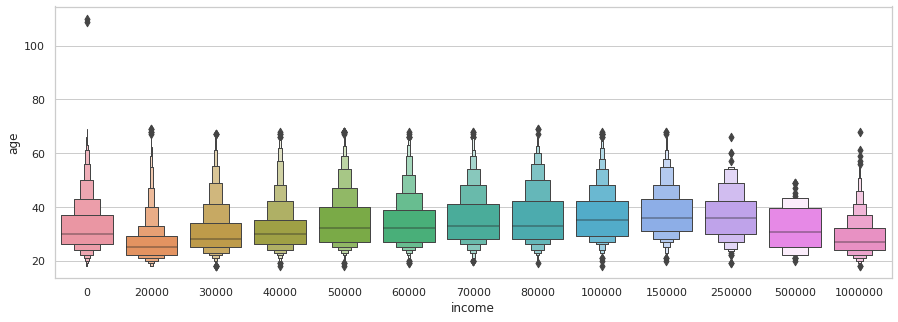

In [48]:
plt.figure(figsize=(15, 5))

sns.set_theme(style="whitegrid")

sns.boxenplot(x="income", y="age",
              data=df);

In [49]:
mask=df["income"]!=0
data=(df[mask]
 .groupby("income")
    [["sex", "Total Words"]]
 .count()
)

data=data.rename(columns= {"sex":"number of participants"})
data

,number of participants,Total Words
income,,
20000,2952,2952
30000,1048,1048
40000,1005,1005
50000,975,975
60000,736,736
70000,707,707
80000,1111,1111
100000,1621,1621
150000,631,631


In [50]:
data.hvplot.bar(x='income', y='Total Words', rot=90)

:Bars   [income]   (Total Words)

In [51]:
data=(df
 .groupby("education")
    [["sex"]]
 .count()
 .sort_values(by="sex", ascending=False)
)
data["% of participants"]=(data["sex"]/data["sex"].sum())*100
data=data.rename(columns= {"sex":"number of participants"})
data.hvplot.bar(x='education', y='number of participants', rot=45)

:Bars   [education]   (number of participants)

In [52]:
data=(df
 .groupby("ethnicity")
    [["sex"]]
 .count()
 .sort_values(by="sex", ascending=False)
)
data["% of participants"]=(data["sex"]/data["sex"].sum())*100
data=data.rename(columns= {"sex":"number of participants"})
data

,number of participants,% of participants
ethnicity,,
white,32831,54.767624
asian,6134,10.232543
No info,5680,9.475194
hispanic / latin,2823,4.709238
black,2008,3.349681
...,...,...
"asian, native american, pacific islander, hispanic / latin, white, other",1,0.001668
"middle eastern, indian, white",1,0.001668
"black, native american, pacific islander, white, other",1,0.001668


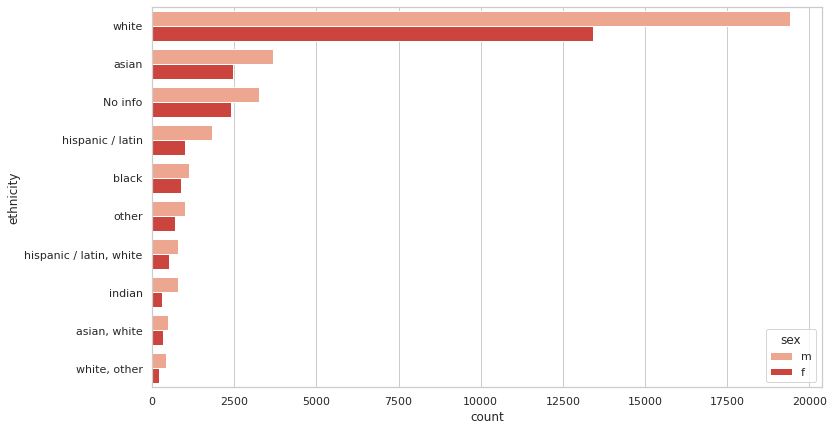

In [53]:
plt.figure(figsize=(12, 7))
sns.countplot(y='ethnicity', data=df, hue="sex",
palette='Reds',
order = df['ethnicity'].value_counts().iloc[:10].index)
plt.show()

In [54]:
data=(df
 .groupby("height")
    [["sex"]]
 .count()
 .sort_values(by="sex", ascending=False)
)
data["% of participants"]=(data["sex"]/data["sex"].sum())*100
data=data.rename(columns= {"sex":"number of participants"})
data.hvplot.bar(x='height', y='number of participants', rot=45)


:Bars   [height]   (number of participants)

In [55]:
df["height"].describe()

count    59946.000000
mean        68.291863
std          4.023813
min          0.000000
25%         66.000000
50%         68.000000
75%         71.000000
max         95.000000
Name: height, dtype: float64

In [56]:
data=(df
 .groupby("sex")
 [["age"]]
 .count()
)
data["% of participants, sex"]=(data["age"]/data["age"].sum())*100
data


,age,"% of participants, sex"
sex,,
f,24117,40.231208
m,35829,59.768792


In [57]:
(df
 .groupby("sex")
 [["age"]]
 .count()
)

,age
sex,
f,24117
m,35829


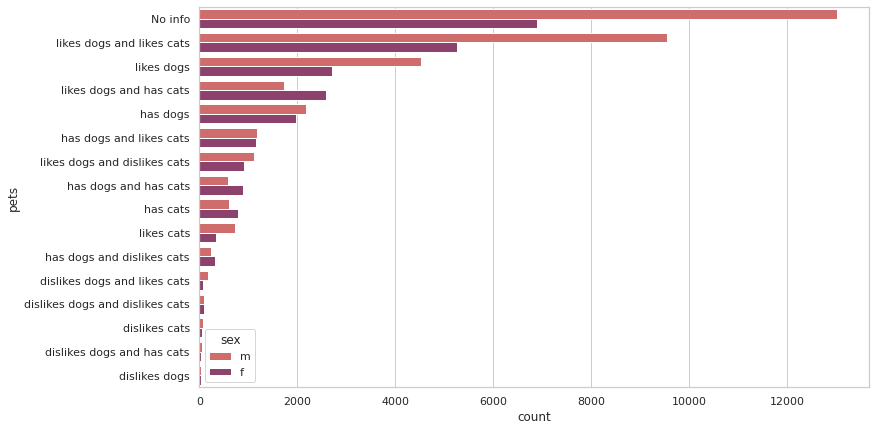

In [58]:
plt.figure(figsize=(12, 7))
sns.countplot(y = 'pets', data=df,
hue='sex', palette='flare',
order=df['pets'].value_counts().iloc[:].index)
plt.show()

In [59]:
passion=df[df["profile text"].str.contains("passion")]

df_p=(passion
.groupby("sex")
 [["sex"]]
 .count()
)

df_p["%"]=(df_p["sex"]/df_p["sex"].sum())*100
pd.options.display.float_format = '{:.2f}%'.format
df_p 

,sex,%
sex,,
f,4975,45.81%
m,5886,54.19%


In [60]:
len(passion)

10861

In [61]:
love=df[df["profile text"].str.contains("love")]

df_l=(love
.groupby("sex")
 [["sex"]]
 .count()
)

df_l["%"]=(df_l["sex"]/df_l["sex"].sum())*100
pd.options.display.float_format = '{:.2f}%'.format
df_l

,sex,%
sex,,
f,17956,45.05%
m,21906,54.95%


In [62]:
len(love)

39862

In [63]:
rel=df[df["profile text"].str.contains("relationship")]

df_r=(rel
.groupby("sex")
 [["sex"]]
 .count()
)

df_r["%"]=(df_r["sex"]/df_r["sex"].sum())*100
pd.options.display.float_format = '{:.2f}%'.format
df_r

,sex,%
sex,,
f,3036,44.97%
m,3715,55.03%


In [64]:
len(rel)

6751

In [65]:
rel=df[df["profile text"].str.contains("serious relationship")]

df_r=(rel
.groupby("sex")
 [["sex"]]
 .count()
)

df_r["%"]=(df_r["sex"]/df_r["sex"].sum())*100
pd.options.display.float_format = '{:.2f}%'.format
df_r

,sex,%
sex,,
f,114,45.97%
m,134,54.03%


In [66]:
len(rel)

248

In [67]:
rel=df[df["profile text"].str.contains("hook*")]

df_r=(rel
.groupby("sex")
 [["sex"]]
 .count()
)
df_r["%"]=(df_r["sex"]/df_r["sex"].sum())*100
pd.options.display.float_format = '{:.2f}%'.format
df_r

,sex,%
sex,,
f,8357,41.91%
m,11585,58.09%


In [68]:
len(rel)

19942

In [69]:
rel=df[df["profile text"].str.contains("marriage")]

df_r=(rel
.groupby("sex")
 [["sex"]]
 .count()
)

df_r["%"]=(df_r["sex"]/df_r["sex"].sum())*100
pd.options.display.float_format = '{:.2f}%'.format
df_r

,sex,%
sex,,
f,269,47.78%
m,294,52.22%


In [70]:
len(rel)

563

In [71]:
rel=df[df["profile text"].str.contains("ons")]

df_r=(rel
.groupby("sex")
 [["sex"]]
 .count()
)

df_r["%"]=(df_r["sex"]/df_r["sex"].sum())*100
pd.options.display.float_format = '{:.2f}%'.format
df_r

,sex,%
sex,,
f,13420,40.59%
m,19645,59.41%


In [72]:
len(rel)

33065

In [73]:
df.head(1)

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,last_online,location,offspring,pets,religion,sign,smokes,speaks,profile text,Total Words
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,2012-06-28-20-30,"south san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism and very serious about it,gemini,sometimes,english,about me: i would love to think that i was so...,420


In [74]:
data=df.copy()

In [75]:
data['income']

0             0
1         80000
2             0
3         20000
4             0
          ...  
59941         0
59942         0
59943    100000
59944         0
59945         0
Name: income, Length: 59946, dtype: int64

In [76]:
data["sex"]=data["sex"].astype("category")
data["sex"].cat.set_categories(["m","f"], inplace=True)

In [77]:
pd.options.display.float_format = '{:.0f}'.format
pd.pivot_table(data=data, index=data.sex, values="income", aggfunc=np.mean)


,income
sex,
m,25992
f,11183


In [78]:
pd.pivot_table(data=data, index=data.education, values=["age", "income"],aggfunc=np.mean)

,age,income
education,,
No info,33,11101
college/university,33,21223
dropped out of college/university,35,34935
dropped out of high school,30,73922
dropped out of law school,36,83889
dropped out of masters program,37,28571
dropped out of med school,37,14167
dropped out of ph.d program,37,38425
dropped out of space camp,32,80593


In [79]:
pd.pivot_table(data=data, index=["education", "sex"],aggfunc=np.mean)

Total Words  age  height  income
education                         sex                                  
No info                           m            225   32      70   14563
                                  f            232   33      65    4952
college/university                m            287   34      70   24212
                                  f            263   33      65   15694
dropped out of college/university m            410   35      70   37733
...                                            ...  ...     ...     ...
working on ph.d program           f            383   29      65   13186
working on space camp             m            375   32      71   63442
                                  f            348   31      65   65401
working on two-year college       m            287   25      70   16895
                                  f            305   25      65   12841

[66 rows x 4 columns]

In [80]:
pd.pivot_table(data=data, index=["smokes", "drinks"], values="income")

income
smokes         drinks             
No info        No info       13466
               desperately  100606
               not at all    12295
               often         24178
               rarely        10763
               socially      15537
               very often    26071
no             No info       10782
               desperately   50915
               not at all    20411
               often         24765
               rarely        17984
               socially      17783
               very often    39663
sometimes      No info       58727
               desperately  150286
               not at all    30943
               often         35439
               rarely        34148
               socially      21904
               very often    54098
trying to quit No info        2759
               desperately  127143
               not at all    30175
               often         41751
               rarely        16556
               socially      23772
               very often    85500
when drinking  No info        3636
               desperately  235455
               not at all    96154
               often         41100
               rarely        12521
               socially      20877
               very often   141754
yes            No info        7045
               desperately   66667
               not at all    15101
               often         35298
               rarely        26667
               socially      23518
               very often    94409

In [81]:
pd.pivot_table(data=data, index=["smokes", "drinks"], values=["income"])

income
smokes         drinks             
No info        No info       13466
               desperately  100606
               not at all    12295
               often         24178
               rarely        10763
               socially      15537
               very often    26071
no             No info       10782
               desperately   50915
               not at all    20411
               often         24765
               rarely        17984
               socially      17783
               very often    39663
sometimes      No info       58727
               desperately  150286
               not at all    30943
               often         35439
               rarely        34148
               socially      21904
               very often    54098
trying to quit No info        2759
               desperately  127143
               not at all    30175
               often         41751
               rarely        16556
               socially      23772
               very often    85500
when drinking  No info        3636
               desperately  235455
               not at all    96154
               often         41100
               rarely        12521
               socially      20877
               very often   141754
yes            No info        7045
               desperately   66667
               not at all    15101
               often         35298
               rarely        26667
               socially      23518
               very often    94409

In [82]:
pd.pivot_table(data=data, index="education", values=["income"], aggfunc=[np.mean,len], fill_value=0)

,mean,len
,income,income
education,,
No info,11101,6628
college/university,21223,801
dropped out of college/university,34935,995
dropped out of high school,73922,102
dropped out of law school,83889,18
dropped out of masters program,28571,140
dropped out of med school,14167,12
dropped out of ph.d program,38425,127


In [83]:
pd.pivot_table(data=data, 
               index=["status", "sex"], 
               values=["income", "age"],
               aggfunc=np.mean, 
               fill_value=0, 
               margins=True)


age  income
status         sex             
available      m     35   31902
               f     32   20412
married        m     39   28971
               f     34   22296
seeing someone m     31   24958
               f     28   22303
single         m     32   25800
               f     33   10345
unknown        m     41       0
               f     28   10000
All                  32   20034

In [84]:
pd.pivot_table(data=data, 
               index=["status", "sex"], 
               values=["income", "age"],
               aggfunc={"income": np.mean, "age": np.median}, 
               fill_value=0, 
               margins=True)

age  income
status         sex             
available      m     33   31902
               f     30   20412
married        m     37   28971
               f     32   22296
seeing someone m     29   24958
               f     27   22303
single         m     30   25800
               f     30   10345
unknown        m     38       0
               f     26   10000
All                  30   20034

In [85]:
table=pd.pivot_table(data=data, 
               index=["status", "sex"], 
               values=["income", "age"],
               columns="orientation",
               aggfunc={"income": np.mean, "age": np.median}, 
               fill_value=0, 
               margins=True)
table

age                    income                     
orientation        bisexual gay straight All bisexual   gay straight   All
status         sex                                                        
available      m         33  31       33  33    35543 13556    33949 31902
               f         29  29       32  30    19247 35481    15861 20412
married        m         37  34       38  37     8182 33333    30132 28971
               f         32  30       32  32     8367 78462    21644 22296
seeing someone m         28  29       30  29    29821 20066    25504 24958
               f         27  27       27  27    24638 19848    21950 22303
single         m         27  30       30  30    38733 12027    27306 25800
               f         26  29       31  30    20251 13219     9421 10345
unknown        m          0  57       38  38        0     0        0     0
               f          0   0       26  26        0     0    10000 10000
All                      27  30       30  30    24958 13390    20488 20034

In [86]:
table=pd.pivot_table(data=data, 
               index=["status", "sex"], 
               values=["income", "age"],
               columns="orientation",
               aggfunc=[len, np.mean],
               fill_value=0, 
               margins=True)
table

len                                                \
                        age                         income                  
orientation        bisexual   gay straight    All bisexual   gay straight   
status         sex                                                          
available      m        175   135      899   1209      175   135      899   
               f        279   104      273    656      279   104      273   
married        m         11    12      152    175       11    12      152   
               f         49    13       73    135       49    13       73   
seeing someone m         56   151      854   1061       56   151      854   
               f        235   132      636   1003      235   132      636   
single         m        529  3686    29163  33378      529  3686    29163   
               f       1433  1339    19547  22319     1433  1339    19547   
unknown        m          0     1        5      6        0     1        5   
               f          0     0        4      4        0     0        4   
All                    2767  5573    51606  59946     2767  5573    51606   

                              mean                                           \
                               age                    income                  
orientation           All bisexual gay straight All bisexual   gay straight   
status         sex                                                            
available      m     1209       34  34       35  35    35543 13556    33949   
               f      656       31  30       34  32    19247 35481    15861   
married        m      175       37  37       39  39     8182 33333    30132   
               f      135       33  31       35  34     8367 78462    21644   
seeing someone m     1061       29  30       31  31    29821 20066    25504   
               f     1003       28  28       28  28    24638 19848    21950   
single         m    33378       30  33       32  32    38733 12027    27306   
               f    22319       28  32       33  33    20251 13219     9421   
unknown        m        6        0  57       37  41        0     0        0   
               f        4        0   0       28  28        0     0    10000   
All                 59946       29  32       33  32    24958 13390    20488   

                          
                          
orientation          All  
status         sex        
available      m   31902  
               f   20412  
married        m   28971  
               f   22296  
seeing someone m   24958  
               f   22303  
single         m   25800  
               f   10345  
unknown        m       0  
               f   10000  
All                20034

In [87]:
table.query('status==["available"]')

len                                                   \
                   age                       income                       
orientation   bisexual  gay straight   All bisexual  gay straight   All   
status    sex                                                             
available m        175  135      899  1209      175  135      899  1209   
          f        279  104      273   656      279  104      273   656   

                  mean                                                 
                   age                    income                       
orientation   bisexual gay straight All bisexual   gay straight   All  
status    sex                                                          
available m         34  34       35  35    35543 13556    33949 31902  
          f         31  30       34  32    19247 35481    15861 20412

In [88]:
table.query('status==["available", "married"]')

len                                                   \
                   age                       income                       
orientation   bisexual  gay straight   All bisexual  gay straight   All   
status    sex                                                             
available m        175  135      899  1209      175  135      899  1209   
          f        279  104      273   656      279  104      273   656   
married   m         11   12      152   175       11   12      152   175   
          f         49   13       73   135       49   13       73   135   

                  mean                                                 
                   age                    income                       
orientation   bisexual gay straight All bisexual   gay straight   All  
status    sex                                                          
available m         34  34       35  35    35543 13556    33949 31902  
          f         31  30       34  32    19247 35481    15861 20412  
married   m         37  37       39  39     8182 33333    30132 28971  
          f         33  31       35  34     8367 78462    21644 22296

In [89]:
pd.set_option('display.max_rows', None) 
pd.pivot_table(data,
               index=["drugs", "drinks", "smokes"], 
               values=["age", "income"], 
               aggfunc=[np.mean, len],
               margins=True)

mean           len       
                                      age income    age income
drugs     drinks      smokes                                  
No info   No info     No info          30  11019    962    962
                      no               33   8407    339    339
                      sometimes        32  44000     25     25
                      trying to quit   33   2667     15     15
                      when drinking    32      0      8      8
                      yes              27   7391     23     23
          desperately No info          28 103182     22     22
                      no               33  44545     44     44
                      sometimes        27 142857      7      7
                      trying to quit   25 204000      5      5
                      when drinking    31 148571      7      7
                      yes              28      0      5      5
          not at all  No info          33   3636     11     11
                      no               38  26074    135    135
                      sometimes        32  11429     21     21
                      trying to quit   35   5833     12     12
                      when drinking    34  50000      3      3
                      yes              30   2222     18     18
          often       No info          29  22809    178    178
                      no               32  19363    738    738
                      sometimes        29  25532    141    141
                      trying to quit   31   5094     53     53
                      when drinking    30  37568    111    111
                      yes              29  16404    114    114
          rarely      No info          33  15102     49     49
                      no               35  17003    584    584
                      sometimes        31  27547     53     53
                      trying to quit   36  45000     24     24
                      when drinking    32  14615     26     26
                      yes              34   9091     33     33
          socially    No info          30  14860   1535   1535
                      no               32  15553   6857   6857
                      sometimes        29  19454    696    696
                      trying to quit   31  21693    254    254
                      when drinking    29  18647    658    658
                      yes              29  23695    249    249
          very often  No info          31  83333      6      6
                      no               30  14375     32     32
                      sometimes        26   8571      7      7
                      trying to quit   28      0      4      4
                      when drinking    26  10000      4      4
                      yes              29 101667     12     12
never     No info     No info          31  14261    941    941
                      no               32   8820    517    517
                      sometimes        28  81154     26     26
                      trying to quit   33      0     12     12
                      when drinking    35   6154     13     13
                      yes              32   3571     14     14
          desperately No info          34      0      6      6
                      no               30  35714     70     70
                      sometimes        29  22000     10     10
                      trying to quit   33 113333      9      9
                      when drinking    28 248000     10     10
                      yes              24  48571      7      7
          not at all  No info          35  15106     47     47
                      no               36  19163   2546   2546
                      sometimes        36  38596    114    114
                      trying to quit   36  25000     92     92
                      when drinking    31 154286      7      7
                      yes              32  17281    114    114
          often       No info          30  12358    123    123
     

In [90]:
pd.set_option('display.max_rows', None) 
bad_habit=pd.pivot_table(data,
               index=["drugs", "drinks", "smokes"], 
               values="income", 
               aggfunc=[np.mean, len],
               margins=True)
bad_habit

mean    len
                                     income income
drugs     drinks      smokes                      
No info   No info     No info         11019    962
                      no               8407    339
                      sometimes       44000     25
                      trying to quit   2667     15
                      when drinking       0      8
                      yes              7391     23
          desperately No info        103182     22
                      no              44545     44
                      sometimes      142857      7
                      trying to quit 204000      5
                      when drinking  148571      7
                      yes                 0      5
          not at all  No info          3636     11
                      no              26074    135
                      sometimes       11429     21
                      trying to quit   5833     12
                      when drinking   50000      3
                      yes              2222     18
          often       No info         22809    178
                      no              19363    738
                      sometimes       25532    141
                      trying to quit   5094     53
                      when drinking   37568    111
                      yes             16404    114
          rarely      No info         15102     49
                      no              17003    584
                      sometimes       27547     53
                      trying to quit  45000     24
                      when drinking   14615     26
                      yes              9091     33
          socially    No info         14860   1535
                      no              15553   6857
                      sometimes       19454    696
                      trying to quit  21693    254
                      when drinking   18647    658
                      yes             23695    249
          very often  No info         83333      6
                      no              14375     32
                      sometimes        8571      7
                      trying to quit      0      4
                      when drinking   10000      4
                      yes            101667     12
never     No info     No info         14261    941
                      no               8820    517
                      sometimes       81154     26
                      trying to quit      0     12
                      when drinking    6154     13
                      yes              3571     14
          desperately No info             0      6
                      no              35714     70
                      sometimes       22000     10
                      trying to quit 113333      9
                      when drinking  248000     10
                      yes             48571      7
          not at all  No info         15106     47
                      no              19163   2546
                      sometimes       38596    114
                      trying to quit  25000     92
                      when drinking  154286      7
                      yes             17281    114
          often       No info         12358    123
                      no              21920   1500
                      sometimes       24889    180
                      trying to quit  43051     59
                      when drinking   32585    147
                      yes             18857    140
          rarely      No info          7460     63
                      no              17115   4125
                      sometimes       42848    165
                      trying to quit  10000     96
                      when drinking   11077     65
                      yes             31842     76
          socially    No info         13208   1119
                      no              17084  22263
                      sometimes       18755   1036
                      trying to quit  23373    415
          

In [91]:
bad_habit.query('smokes=="yes" and drugs=="never"', inplace=True)
bad_habit

mean    len
                         income income
drugs drinks      smokes              
never No info     yes      3571     14
      desperately yes     48571      7
      not at all  yes     17281    114
      often       yes     18857    140
      rarely      yes     31842     76
      socially    yes     19390    426
      very often  yes     90000     26

In [92]:
pd.set_option('display.max_rows', None) 
bad_habit=pd.pivot_table(data,
               index=["drugs", "drinks", "smokes"], 
               values="income", 
               aggfunc=[np.mean, len],
               margins=True)
bad_habit

mean    len
                                     income income
drugs     drinks      smokes                      
No info   No info     No info         11019    962
                      no               8407    339
                      sometimes       44000     25
                      trying to quit   2667     15
                      when drinking       0      8
                      yes              7391     23
          desperately No info        103182     22
                      no              44545     44
                      sometimes      142857      7
                      trying to quit 204000      5
                      when drinking  148571      7
                      yes                 0      5
          not at all  No info          3636     11
                      no              26074    135
                      sometimes       11429     21
                      trying to quit   5833     12
                      when drinking   50000      3
                      yes              2222     18
          often       No info         22809    178
                      no              19363    738
                      sometimes       25532    141
                      trying to quit   5094     53
                      when drinking   37568    111
                      yes             16404    114
          rarely      No info         15102     49
                      no              17003    584
                      sometimes       27547     53
                      trying to quit  45000     24
                      when drinking   14615     26
                      yes              9091     33
          socially    No info         14860   1535
                      no              15553   6857
                      sometimes       19454    696
                      trying to quit  21693    254
                      when drinking   18647    658
                      yes             23695    249
          very often  No info         83333      6
                      no              14375     32
                      sometimes        8571      7
                      trying to quit      0      4
                      when drinking   10000      4
                      yes            101667     12
never     No info     No info         14261    941
                      no               8820    517
                      sometimes       81154     26
                      trying to quit      0     12
                      when drinking    6154     13
                      yes              3571     14
          desperately No info             0      6
                      no              35714     70
                      sometimes       22000     10
                      trying to quit 113333      9
                      when drinking  248000     10
                      yes             48571      7
          not at all  No info         15106     47
                      no              19163   2546
                      sometimes       38596    114
                      trying to quit  25000     92
                      when drinking  154286      7
                      yes             17281    114
          often       No info         12358    123
                      no              21920   1500
                      sometimes       24889    180
                      trying to quit  43051     59
                      when drinking   32585    147
                      yes             18857    140
          rarely      No info          7460     63
                      no              17115   4125
                      sometimes       42848    165
                      trying to quit  10000     96
                      when drinking   11077     65
                      yes             31842     76
          socially    No info         13208   1119
                      no              17084  22263
                      sometimes       18755   1036
                      trying to quit  23373    415
          

In [93]:
bad_habit.xs(("never", "not at all", "no")) ## Never use Drugs, no drinking but no smoking

mean  income   19163
len   income    2546
Name: (never, not at all, no), dtype: float64

In [94]:
bad_habit.xs(("sometimes", "very often", "yes")) ## Sometimes use Drugs, very often drinking but smoking


mean  income   72549
len   income      51
Name: (sometimes, very often, yes), dtype: float64

In [95]:
bad_habit.dtypes

mean  income    float64
len   income      int64
dtype: object

In [96]:
bad_habit.query('drugs=="never"')

mean    len
                                 income income
drugs drinks      smokes                      
never No info     No info         14261    941
                  no               8820    517
                  sometimes       81154     26
                  trying to quit      0     12
                  when drinking    6154     13
                  yes              3571     14
      desperately No info             0      6
                  no              35714     70
                  sometimes       22000     10
                  trying to quit 113333      9
                  when drinking  248000     10
                  yes             48571      7
      not at all  No info         15106     47
                  no              19163   2546
                  sometimes       38596    114
                  trying to quit  25000     92
                  when drinking  154286      7
                  yes             17281    114
      often       No info         12358    123
                  no              21920   1500
                  sometimes       24889    180
                  trying to quit  43051     59
                  when drinking   32585    147
                  yes             18857    140
      rarely      No info          7460     63
                  no              17115   4125
                  sometimes       42848    165
                  trying to quit  10000     96
                  when drinking   11077     65
                  yes             31842     76
      socially    No info         13208   1119
                  no              17084  22263
                  sometimes       18755   1036
                  trying to quit  23373    415
                  when drinking   17094    998
                  yes             19390    426
      very often  No info             0     13
                  no              36344     93
                  sometimes       25789     19
                  trying to quit  91429      7
                  when drinking   13333     15
                  yes             90000     26

In [97]:
bad_habit.query('drugs=="never" & drinks==["desperately","not at all"] & smokes=="no"')

mean    len
                         income income
drugs drinks      smokes              
never desperately no      35714     70
      not at all  no      19163   2546

In [98]:
data.columns

Index(['age', 'status', 'sex', 'orientation', 'body_type', 'diet', 'drinks',
       'drugs', 'education', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'pets', 'religion', 'sign',
       'smokes', 'speaks', 'profile text', 'Total Words'],
      dtype='object')

In [99]:
df['Time stamp']=pd.to_datetime(df['last_online'], format= '%Y-%m-%d-%H-%M')

In [100]:
df['date_only'] = df['Time stamp'].dt.date

In [101]:
df['date_only'].value_counts()

2012-06-30    13754
2012-06-29     8441
2012-06-28     3981
2012-06-27     2743
2012-07-01     2090
2012-06-26     2066
2012-06-25     1582
2012-06-24     1197
2012-06-23      766
2012-06-22      762
2012-06-21      689
2012-06-20      674
2012-06-19      599
2012-06-18      577
2012-06-17      516
2012-06-15      348
2012-06-14      347
2012-06-16      344
2012-06-13      330
2012-06-12      310
2012-06-11      290
2012-06-10      287
2012-06-07      254
2012-06-05      236
2012-06-09      227
2012-06-08      218
2012-06-04      215
2012-06-03      209
2012-06-06      206
2012-05-30      181
2012-05-29      179
2012-05-31      175
2012-06-01      155
2012-05-22      152
2012-06-02      148
2012-05-28      144
2012-05-21      141
2012-05-20      141
2012-05-23      140
2012-05-25      138
2012-05-24      131
2012-05-26      128
2012-05-27      127
2012-05-19      126
2012-05-14      121
2012-05-07      121
2012-05-15      120
2012-04-23      120
2012-05-13      117
2012-05-09      115


<AxesSubplot:>

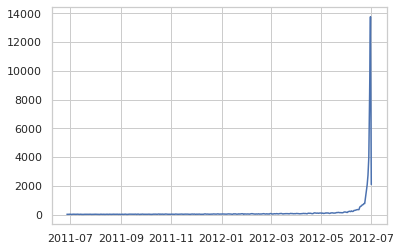

In [102]:
s = df['date_only'].value_counts().sort_index()
s.plot()

In [124]:
df['location'][0]

'south san francisco, california'

In [125]:
df.location[1]

'oakland, california'

In [105]:
type(df['location'])

pandas.core.series.Series

In [106]:
new = df["location"].str.split(",", n = 1, expand = True)

In [107]:
df["city"]= new[0]

In [108]:
df["state"]= new[1]

In [109]:
df.head(1)

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,religion,sign,smokes,speaks,profile text,Total Words,Time stamp,date_only,city,state
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,agnosticism and very serious about it,gemini,sometimes,english,about me: i would love to think that i was so...,420,2012-06-28 20:30:00,2012-06-28,south san francisco,california


In [110]:
#https://medium.com/analytics-vidhya/how-to-generate-lat-and-long-coordinates-of-city-without-using-apis-25ebabcaf1d5
#Case 1: Where only City name is mention

# from geopy.geocoders import Nominatim

# address='south san francisco'
# geolocator = Nominatim(user_agent="Your_Name")
# location = geolocator.geocode(address)
# print(location.address)
# print((location.latitude, location.longitude))

In [111]:
# from geopy.geocoders import Nominatim

# for city in df['city']:
#     print(city)
#     address = city
#     geolocator = Nominatim(user_agent="Your_Name")
#     location = geolocator.geocode(address)
#     log_lat= (location.latitude,location.longitude)
#     df['latitude']=log_lat[0]
#     df['longtitude']=log_lat[1]

In [121]:
#df_location=df[['Latitude','Longitude']]

In [122]:
#https://www.kdnuggets.com/2020/09/geographical-plots-python.html
# import plotly.express as px

# fig = px.density_mapbox(df, lat='Latitude', lon='Longitude', radius=10,
#                         center=dict(lat=0, lon=180), zoom=0,
#                         mapbox_style="stamen-terrain")
# fig.show()

In [136]:
df.iloc[0]

age                                                            22
status                                                     single
sex                                                             m
orientation                                              straight
body_type                                          a little extra
diet                                            strictly anything
drinks                                                   socially
drugs                                                       never
education                           working on college/university
ethnicity                                            asian, white
height                                                         75
income                                                          0
job                                                transportation
last_online                                      2012-06-28-20-30
location                          south san francisco, california
offspring 

KeyError: 0

In [137]:
df.columns

Index(['age', 'status', 'sex', 'orientation', 'body_type', 'diet', 'drinks',
       'drugs', 'education', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'pets', 'religion', 'sign',
       'smokes', 'speaks', 'profile text', 'Total Words', 'Time stamp',
       'date_only', 'city', 'state'],
      dtype='object')

In [142]:
df['body_type'].unique()

array(['a little extra', 'average', 'thin', 'athletic', 'fit', 'No info',
       'skinny', 'curvy', 'full figured', 'jacked', 'rather not say',
       'used up', 'overweight'], dtype=object)

In [143]:
df['diet'].unique()

array(['strictly anything', 'mostly other', 'anything', 'vegetarian',
       'No info', 'mostly anything', 'mostly vegetarian',
       'strictly vegan', 'strictly vegetarian', 'mostly vegan',
       'strictly other', 'mostly halal', 'other', 'vegan',
       'mostly kosher', 'strictly halal', 'halal', 'strictly kosher',
       'kosher'], dtype=object)

In [144]:
df['drinks'].unique()

array(['socially', 'often', 'not at all', 'rarely', 'No info',
       'very often', 'desperately'], dtype=object)

In [145]:
df['ethnicity'].unique()

array(['asian, white', 'white', 'No info', 'asian, black, other',
       'white, other', 'hispanic / latin, white', 'hispanic / latin',
       'pacific islander, white', 'asian', 'black, white',
       'pacific islander', 'asian, native american',
       'asian, pacific islander', 'black, native american, white',
       'middle eastern, other', 'native american, white', 'indian',
       'black', 'black, native american, hispanic / latin, other',
       'black, native american, hispanic / latin',
       'asian, black, pacific islander',
       'asian, middle eastern, black, native american, indian, pacific islander, hispanic / latin, white, other',
       'other', 'hispanic / latin, other', 'asian, black',
       'middle eastern, white', 'native american, white, other',
       'black, native american', 'black, white, other',
       'hispanic / latin, white, other', 'middle eastern', 'black, other',
       'native american, hispanic / latin, white', 'black, indian',
       'indian, white

In [146]:
df['location'].unique()

array(['south san francisco, california', 'oakland, california',
       'san francisco, california', 'berkeley, california',
       'belvedere tiburon, california', 'san mateo, california',
       'daly city, california', 'san leandro, california',
       'atherton, california', 'san rafael, california',
       'walnut creek, california', 'menlo park, california',
       'belmont, california', 'san jose, california',
       'palo alto, california', 'emeryville, california',
       'el granada, california', 'castro valley, california',
       'fairfax, california', 'mountain view, california',
       'burlingame, california', 'martinez, california',
       'pleasant hill, california', 'hayward, california',
       'alameda, california', 'vallejo, california',
       'benicia, california', 'el cerrito, california',
       'mill valley, california', 'richmond, california',
       'redwood city, california', 'el sobrante, california',
       'stanford, california', 'san pablo, california',

In [147]:
df['religion'].unique()

array(['agnosticism and very serious about it',
       'agnosticism but not too serious about it', 'No info', 'atheism',
       'christianity', 'christianity but not too serious about it',
       'atheism and laughing about it',
       'christianity and very serious about it', 'other', 'catholicism',
       'catholicism but not too serious about it',
       'catholicism and somewhat serious about it',
       'agnosticism and somewhat serious about it',
       'catholicism and laughing about it',
       'agnosticism and laughing about it', 'agnosticism',
       'atheism and somewhat serious about it',
       'buddhism but not too serious about it',
       'other but not too serious about it', 'buddhism',
       'other and laughing about it',
       'judaism but not too serious about it',
       'buddhism and laughing about it',
       'other and somewhat serious about it',
       'other and very serious about it',
       'hinduism but not too serious about it',
       'atheism but not t

In [148]:
df['pets'].unique()

array(['likes dogs and likes cats', 'has cats', 'likes cats', 'No info',
       'has dogs and likes cats', 'likes dogs and has cats',
       'likes dogs and dislikes cats', 'has dogs',
       'has dogs and dislikes cats', 'likes dogs',
       'has dogs and has cats', 'dislikes dogs and has cats',
       'dislikes dogs and dislikes cats', 'dislikes cats',
       'dislikes dogs and likes cats', 'dislikes dogs'], dtype=object)

In [149]:
df['speaks'].unique()

array(['english', 'english (fluently), spanish (poorly), french (poorly)',
       'english, french, c++', ...,
       'english (fluently), hindi (poorly), french (poorly), tamil (okay), spanish (poorly)',
       'english (fluently), french (poorly), japanese (poorly), latin (poorly)',
       'english (fluently), french, farsi'], dtype=object)

In [150]:
df['status'].unique()

array(['single', 'available', 'seeing someone', 'married', 'unknown'],
      dtype=object)

In [140]:
df['orientation'].unique()

array(['straight', 'bisexual', 'gay'], dtype=object)

In [141]:
df['sex'].unique()

array(['m', 'f'], dtype=object)

In [151]:
df['smokes'].unique()

array(['sometimes', 'no', 'No info', 'when drinking', 'yes',
       'trying to quit'], dtype=object)

In [154]:
df[df['profile text']=='No info'].count()

age             5488
status          5488
sex             5488
orientation     5488
body_type       5488
diet            5488
drinks          5488
drugs           5488
education       5488
ethnicity       5488
height          5488
income          5488
job             5488
last_online     5488
location        5488
offspring       5488
pets            5488
religion        5488
sign            5488
smokes          5488
speaks          5488
profile text    5488
Total Words     5488
Time stamp      5488
date_only       5488
city            5488
state           5488
dtype: int64